In [1]:
import sys
sys.path.append("..")
from EnsemblePursuitModule.EnsemblePursuitNumpy import EnsemblePursuitNumpy
import numpy as np
import time

In [2]:
data_path='/media/maria/DATA1/Documents/data_for_suite2p/spks_small.npy'
X=np.load(data_path)
print(X.shape)

(18795, 1000)


In [3]:
options_dict={'seed_neuron_av_nr':100,'min_assembly_size':8}
ep_pt=EnsemblePursuitNumpy(n_ensembles=300,lambd=0.005,options_dict=options_dict)
start=time.time()
U,V=ep_pt.fit_transform(X)
end=time.time()

ensemble nr 0
cost 0.9829530309819131
ensemble nr 1
cost 0.9785876802608134
ensemble nr 2
cost 0.9735799561374416
ensemble nr 3
cost 0.9695334540219053
ensemble nr 4
cost 0.9666945395225253
ensemble nr 5
cost 0.9635851099734128
ensemble nr 6
cost 0.9603439623086205
ensemble nr 7
cost 0.958205576137266
ensemble nr 8
cost 0.9560668113365002
ensemble nr 9
cost 0.9539406692403304
ensemble nr 10
cost 0.9519435387149995
ensemble nr 11
cost 0.949960362143243
ensemble nr 12
cost 0.9482074873026911
ensemble nr 13
cost 0.9461215196329746
ensemble nr 14
cost 0.9446863281404312
ensemble nr 15
cost 0.9426068906695352
ensemble nr 16
cost 0.9407309213986832
ensemble nr 17
cost 0.9387411141742596
ensemble nr 18
cost 0.936793193948275
ensemble nr 19
cost 0.9350452750252538
ensemble nr 20
cost 0.9334166137542925
ensemble nr 21
cost 0.9318811345047828
ensemble nr 22
cost 0.9303266178392322
ensemble nr 23
cost 0.9288445772541415
ensemble nr 24
cost 0.9271722579492258
ensemble nr 25
cost 0.9256546383741832

ensemble nr 209
cost 0.7323281505830797
ensemble nr 210
cost 0.7316170595373109
ensemble nr 211
cost 0.7308256748821068
ensemble nr 212
cost 0.7300767946342792
ensemble nr 213
cost 0.729162406131664
ensemble nr 214
cost 0.7281303526299286
ensemble nr 215
cost 0.7269759314094031
ensemble nr 216
cost 0.7261785989729087
ensemble nr 217
cost 0.725136219468548
ensemble nr 218
cost 0.724436342714947
ensemble nr 219
cost 0.7236259144013244
ensemble nr 220
cost 0.722480427993944
ensemble nr 221
cost 0.7217996977338004
ensemble nr 222
cost 0.7211668601957587
ensemble nr 223
cost 0.7204269622615038
ensemble nr 224
cost 0.7197089466991827
ensemble nr 225
cost 0.7190969557988579
ensemble nr 226
cost 0.7184060204101962
ensemble nr 227
cost 0.7176633762578423
ensemble nr 228
cost 0.7167283078065697
ensemble nr 229
cost 0.7159975720422148
ensemble nr 230
cost 0.7152723587161055
ensemble nr 231
cost 0.7140741310879775
ensemble nr 232
cost 0.7134636560357899
ensemble nr 233
cost 0.7125398786547078
ense

In [6]:
np.save('U_spks.npy',U)
np.save('V_spks.npy',V)

nmin 200
0.0310366153717041
0.8710520267486572
0.8915705680847168
0.9796905517578125
(1520, 1600)
(70,)
1.0
time; iteration;  explained PC variance
0.69s     0        0.0380      8
5.90s    10        0.1547      24
11.12s    20        0.2362      80
16.37s    30        0.3489      360
21.77s    40        0.4055      840
27.16s    50        0.4449      1520
32.60s    60        0.4457      1520
38.06s   final      0.4457
132.99s upsampled    0.4457
[ 3252 12499  8778 ... 17281  7305  4458]
[[0.04542521 0.0581868  0.00117701 ... 0.         0.00168708 0.        ]
 [0.06235299 0.06666264 0.00233983 ... 0.         0.00335382 0.        ]
 [0.095976   0.08101141 0.00519253 ... 0.         0.00744278 0.        ]
 ...
 [0.4426523  0.07991832 0.10835351 ... 0.         0.         0.        ]
 [0.41858947 0.05747888 0.11769579 ... 0.         0.         0.        ]
 [0.40375465 0.04523056 0.1220492  ... 0.         0.         0.        ]]


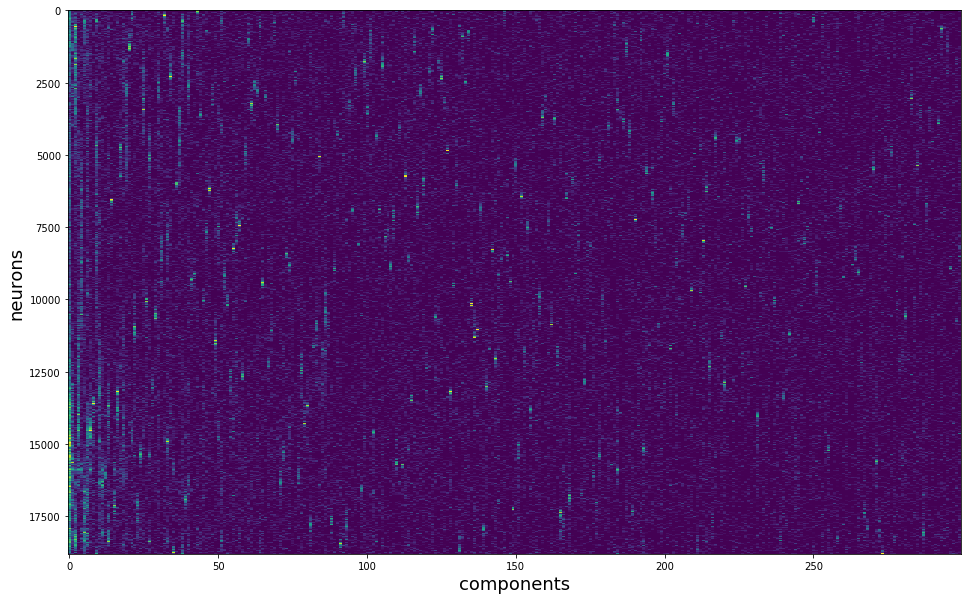

In [9]:
from scipy.stats import zscore
from scipy.ndimage import gaussian_filter1d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import zscore
import os
%matplotlib inline
import sys
sys.path.append('/home/maria/Documents/rastermap/rastermap')
import mapping, imp
imp.reload(mapping)
import numpy as np

model = mapping.Rastermap(n_components=2).fit(U)
isort = np.argsort(model.embedding[:,0])
print(isort)
Sm = gaussian_filter1d(U[isort,:].T, np.minimum(3,int(U.shape[0]*0.005)), axis=1)
Sm = Sm.T
print(Sm)

### view neuron sorting
fs = 2.5 # sampling rate of data in Hz
splot = Sm[::-1,]
plt.figure(figsize=(16,10))
ax=plt.imshow(splot, vmin=0,vmax=1.5,aspect='auto')
plt.xlabel('components', fontsize=18)
plt.ylabel('neurons', fontsize=18)
plt.show()


(18795, 300)


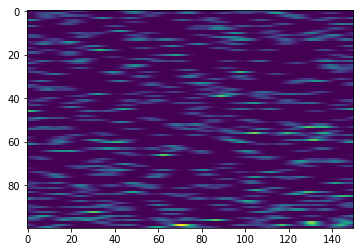

In [51]:
print(Sm.shape)

plt.imshow(Sm[:15000,100].reshape(100,150))

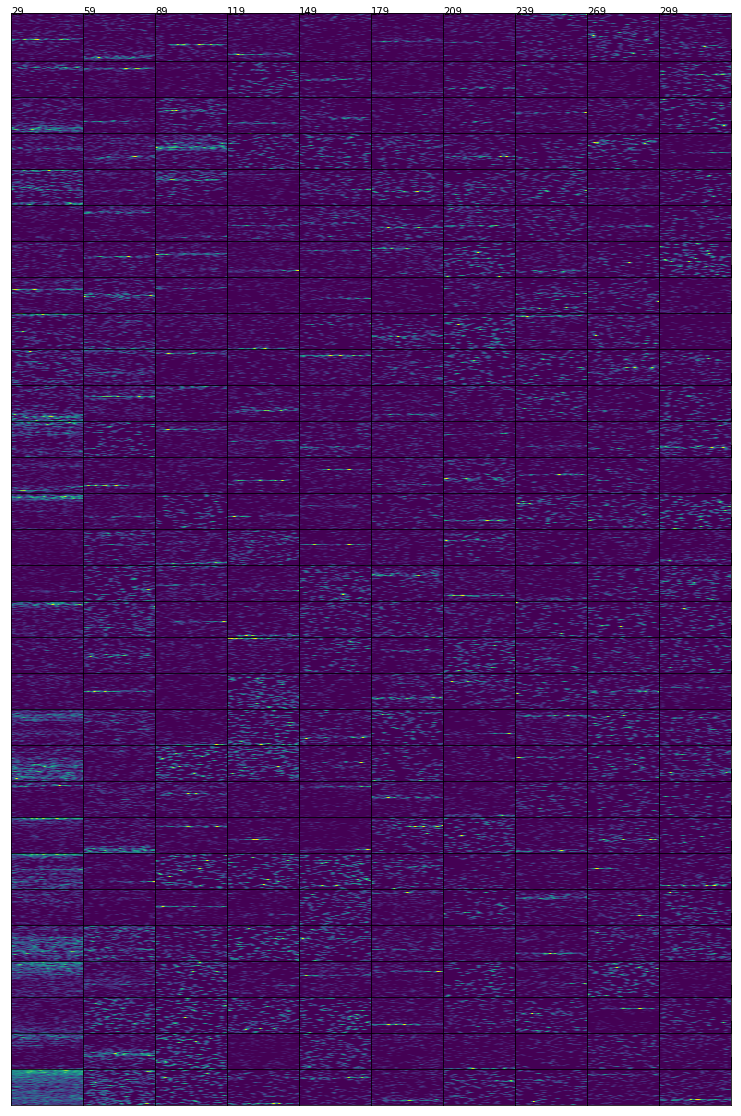

In [66]:
fig=plt.figure(figsize=(10,15))
ax=[]
i=0
mat=Sm.reshape(Sm.shape[0],10,30)
for ind1 in range(0,10):
    for ind2 in range(0,30):
        ax=fig.add_axes([ind1/10,ind2/30,1./10,1./15])
        ax.imshow(mat[:15000,ind1,ind2].reshape(100,150))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.text(x=ind1/10,y=ind2/15,s=str(i))
        i+=1
plt.show()

In [10]:
print(end-start)

8709.822373628616


In [12]:
stat=np.load('/media/maria/DATA1/Documents/data_for_suite2p/stat.npy')
ypos = np.array([stat[n]['med'][0] for n in range(len(stat))]) 
# (notice the python list comprehension [X(n) for n in range(N)])
xpos = np.array([stat[n]['med'][1] for n in range(len(stat))]) 


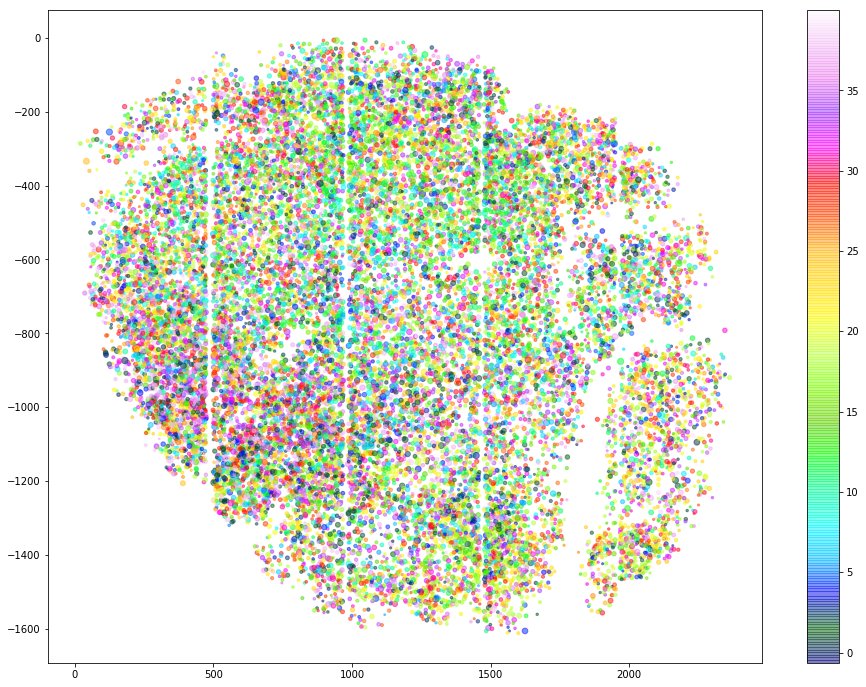

In [13]:
# HERE color cells according to their rastermap embedding
lam=model.lam
plt.figure(figsize=(16,12))
plt.scatter(xpos, -ypos, s=50*lam/np.max(lam), c=model.embedding[:,0], 
            cmap='gist_ncar', alpha = .5)
plt.colorbar()
plt.show()

In [41]:
max_ensemble=np.argmax(U,axis=1)
print(max_ensemble)

[ 30  78   1 ... 148 265  96]


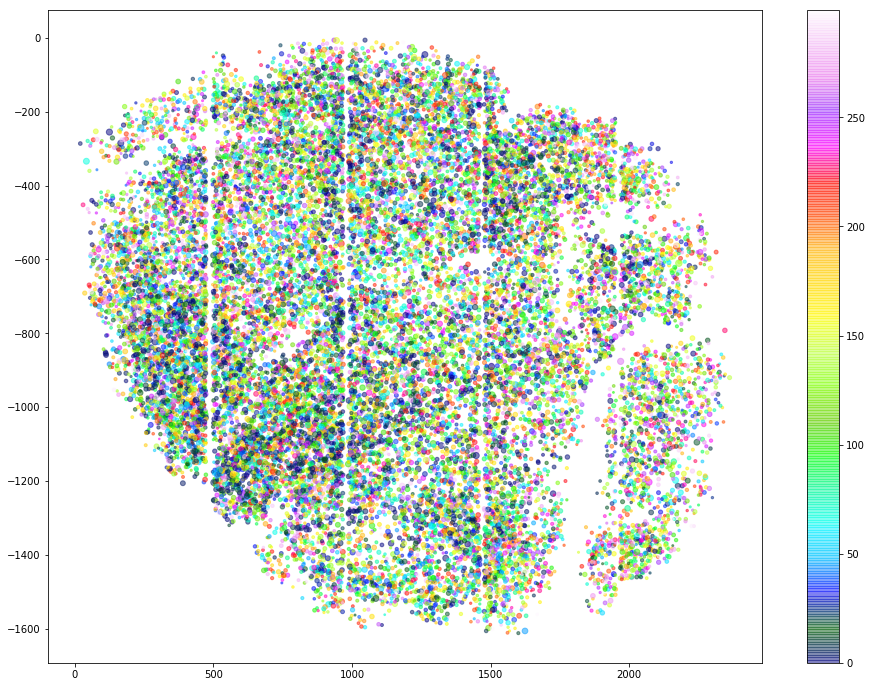

In [42]:
# HERE color cells according to their rastermap embedding
lam=model.lam
plt.figure(figsize=(16,12))
plt.scatter(xpos, -ypos, s=50*lam/np.max(lam), c=max_ensemble, 
            cmap='gist_ncar', alpha = .5)
plt.colorbar()
plt.show()

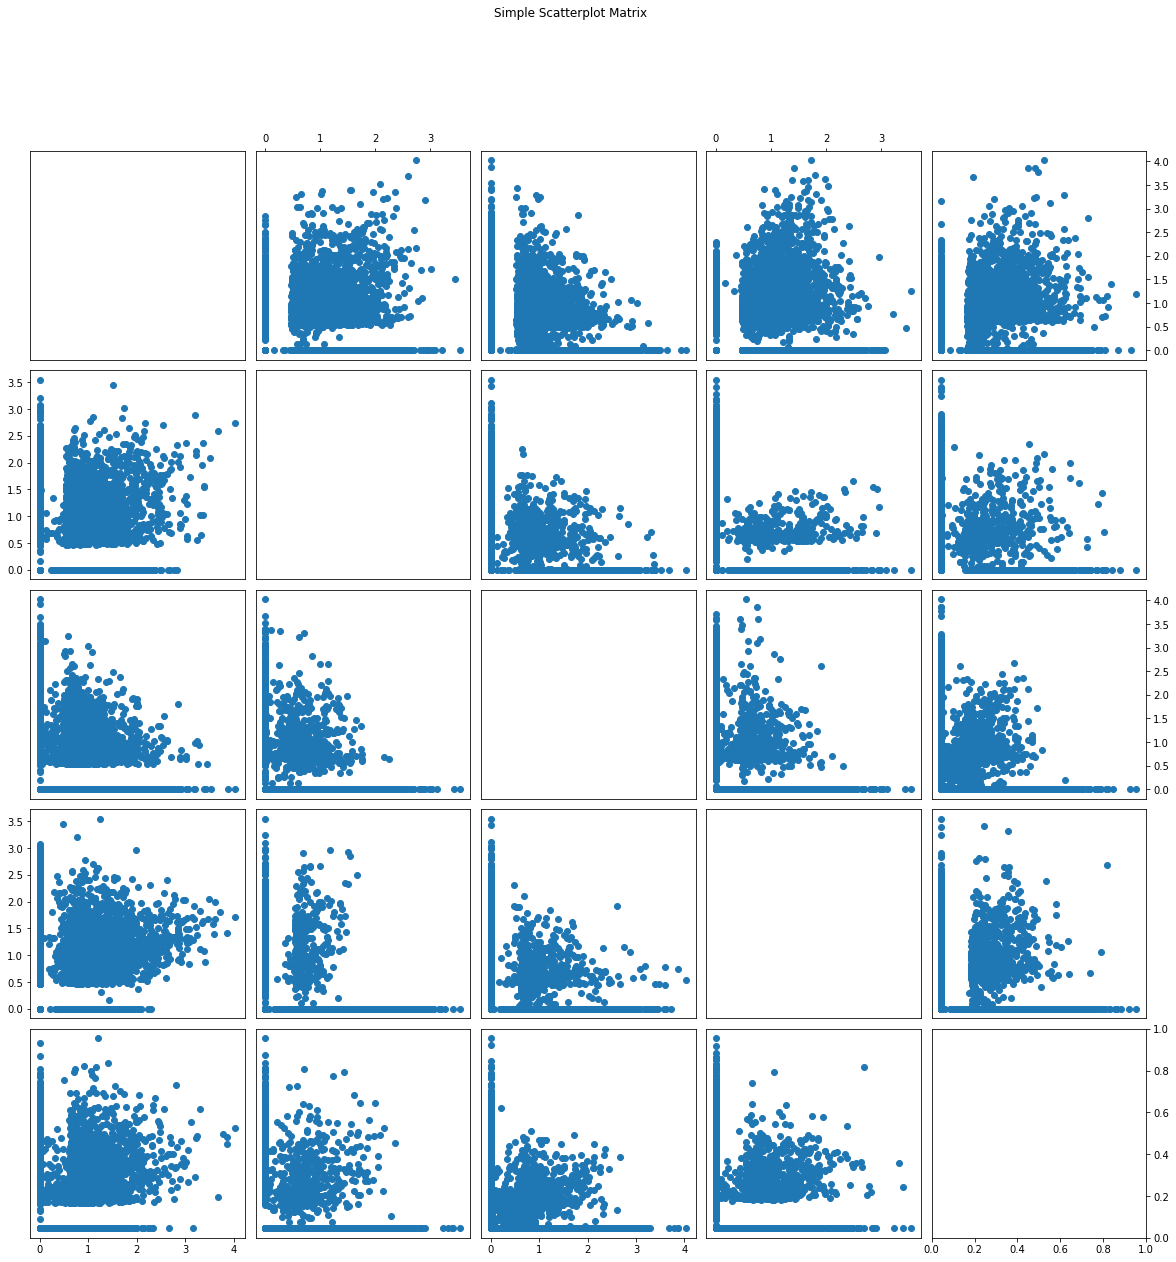

In [26]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def scatterplot_matrix(data, names, **kwargs):
    """Plots a scatterplot matrix of subplots.  Each row of "data" is plotted
    against other rows, resulting in a nrows by nrows grid of subplots with the
    diagonal subplots labeled with "names".  Additional keyword arguments are
    passed on to matplotlib's "plot" command. Returns the matplotlib figure
    object containg the subplot grid."""
    numvars, numdata = data.shape
    fig, axes = plt.subplots(nrows=numvars, ncols=numvars, figsize=(20,20))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)

    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

        # Set up ticks only on one side for the "edge" subplots...
        if ax.is_first_col():
            ax.yaxis.set_ticks_position('left')
        if ax.is_last_col():
            ax.yaxis.set_ticks_position('right')
        if ax.is_first_row():
            ax.xaxis.set_ticks_position('top')
        if ax.is_last_row():
            ax.xaxis.set_ticks_position('bottom')

    # Plot the data.
    for i, j in zip(*np.triu_indices_from(axes, k=1)):
        for x, y in [(i,j), (j,i)]:
            axes[x,y].plot(data[x], data[y], **kwargs)

    # Label the diagonal subplots...
    '''
    for i, label in enumerate(names):
        axes[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction',
                ha='center', va='center')
    '''
    # Turn on the proper x or y axes ticks.
    for i, j in zip(range(numvars), itertools.cycle((-1, 0))):
        axes[j,i].xaxis.set_visible(True)
        axes[i,j].yaxis.set_visible(True)

    return fig

fig = scatterplot_matrix(U[:,0:5].T, 0,marker='o',linestyle='none')
            #linestyle='none', marker='o', color='black', mfc='none')
fig.suptitle('Simple Scatterplot Matrix')
plt.show()